##### This illustration will involve cleaning up a dataset of residential homes in Ames (Iowa). This data was used to predict house prices in the area


In [1]:
# Importing the required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [5]:
# r = requests.get('https://docs.google.com/spreadsheets/d/1G4h5OPmKQ9W7qnNAa6yO_zLJmkwCH-m-/export?format=csv&id=1G4h5OPmKQ9W7qnNAa6yO_zLJmkwCH-m-')
# sheet_data = r.content

# in_url = f'https://docs.google.com/spreadsheets/d/1G4h5OPmKQ9W7qnNAa6yO_zLJmkwCH-m-/edit#gid=1764243349'
# insurance_url = in_url.replace('/edit#gid=', '/export?format=csv&gid=')
# indata_df = pd.read_csv(insurance_url, error_bad_lines=False)
# data_df = pd.read_csv('patient_profile.csv')
# new_pdf = data_df.drop_duplicates(['first_name'])
# lnfn_df = data_df.drop_duplicates(['first_name', 'last_name'])
# lnfndob_df = data_df.drop_duplicates(['first_name', 'last_name', 'dob'])
# new_pdf = pd.concat([data_df['first_name'],data_df['last_name']]).unique()
# lnfndob_df['chronic'].unique()
# chronic = lnfndob_df[lnfndob_df['chronic'] == 'Yes']

In [2]:
# Reading the data

ames_df = pd.read_csv('ames_homes.csv')

In [3]:
ames_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


###### Other Notes:
Importing other file types:
matlab files

In [4]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
ames_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
ames_numerical = ames_df.select_dtypes(include=[np.number])

In [48]:
ames_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [10]:
ames_numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
# ames_non_numerical = ames_df.index.difference(ames_numerical)

# for cols in ames_df.columns:
#     if cols not in ames_numerical.columns:
#         print(cols)

categorical_ames = [cols for cols in ames_df.columns if cols not in ames_numerical.columns ]

In [26]:
len(categorical_ames)

43

In [27]:
ames_categorical = ames_df.select_dtypes(include='object')

In [29]:
ames_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [30]:
cat_list = ames_categorical.columns.tolist()

In [32]:
# cat_list

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

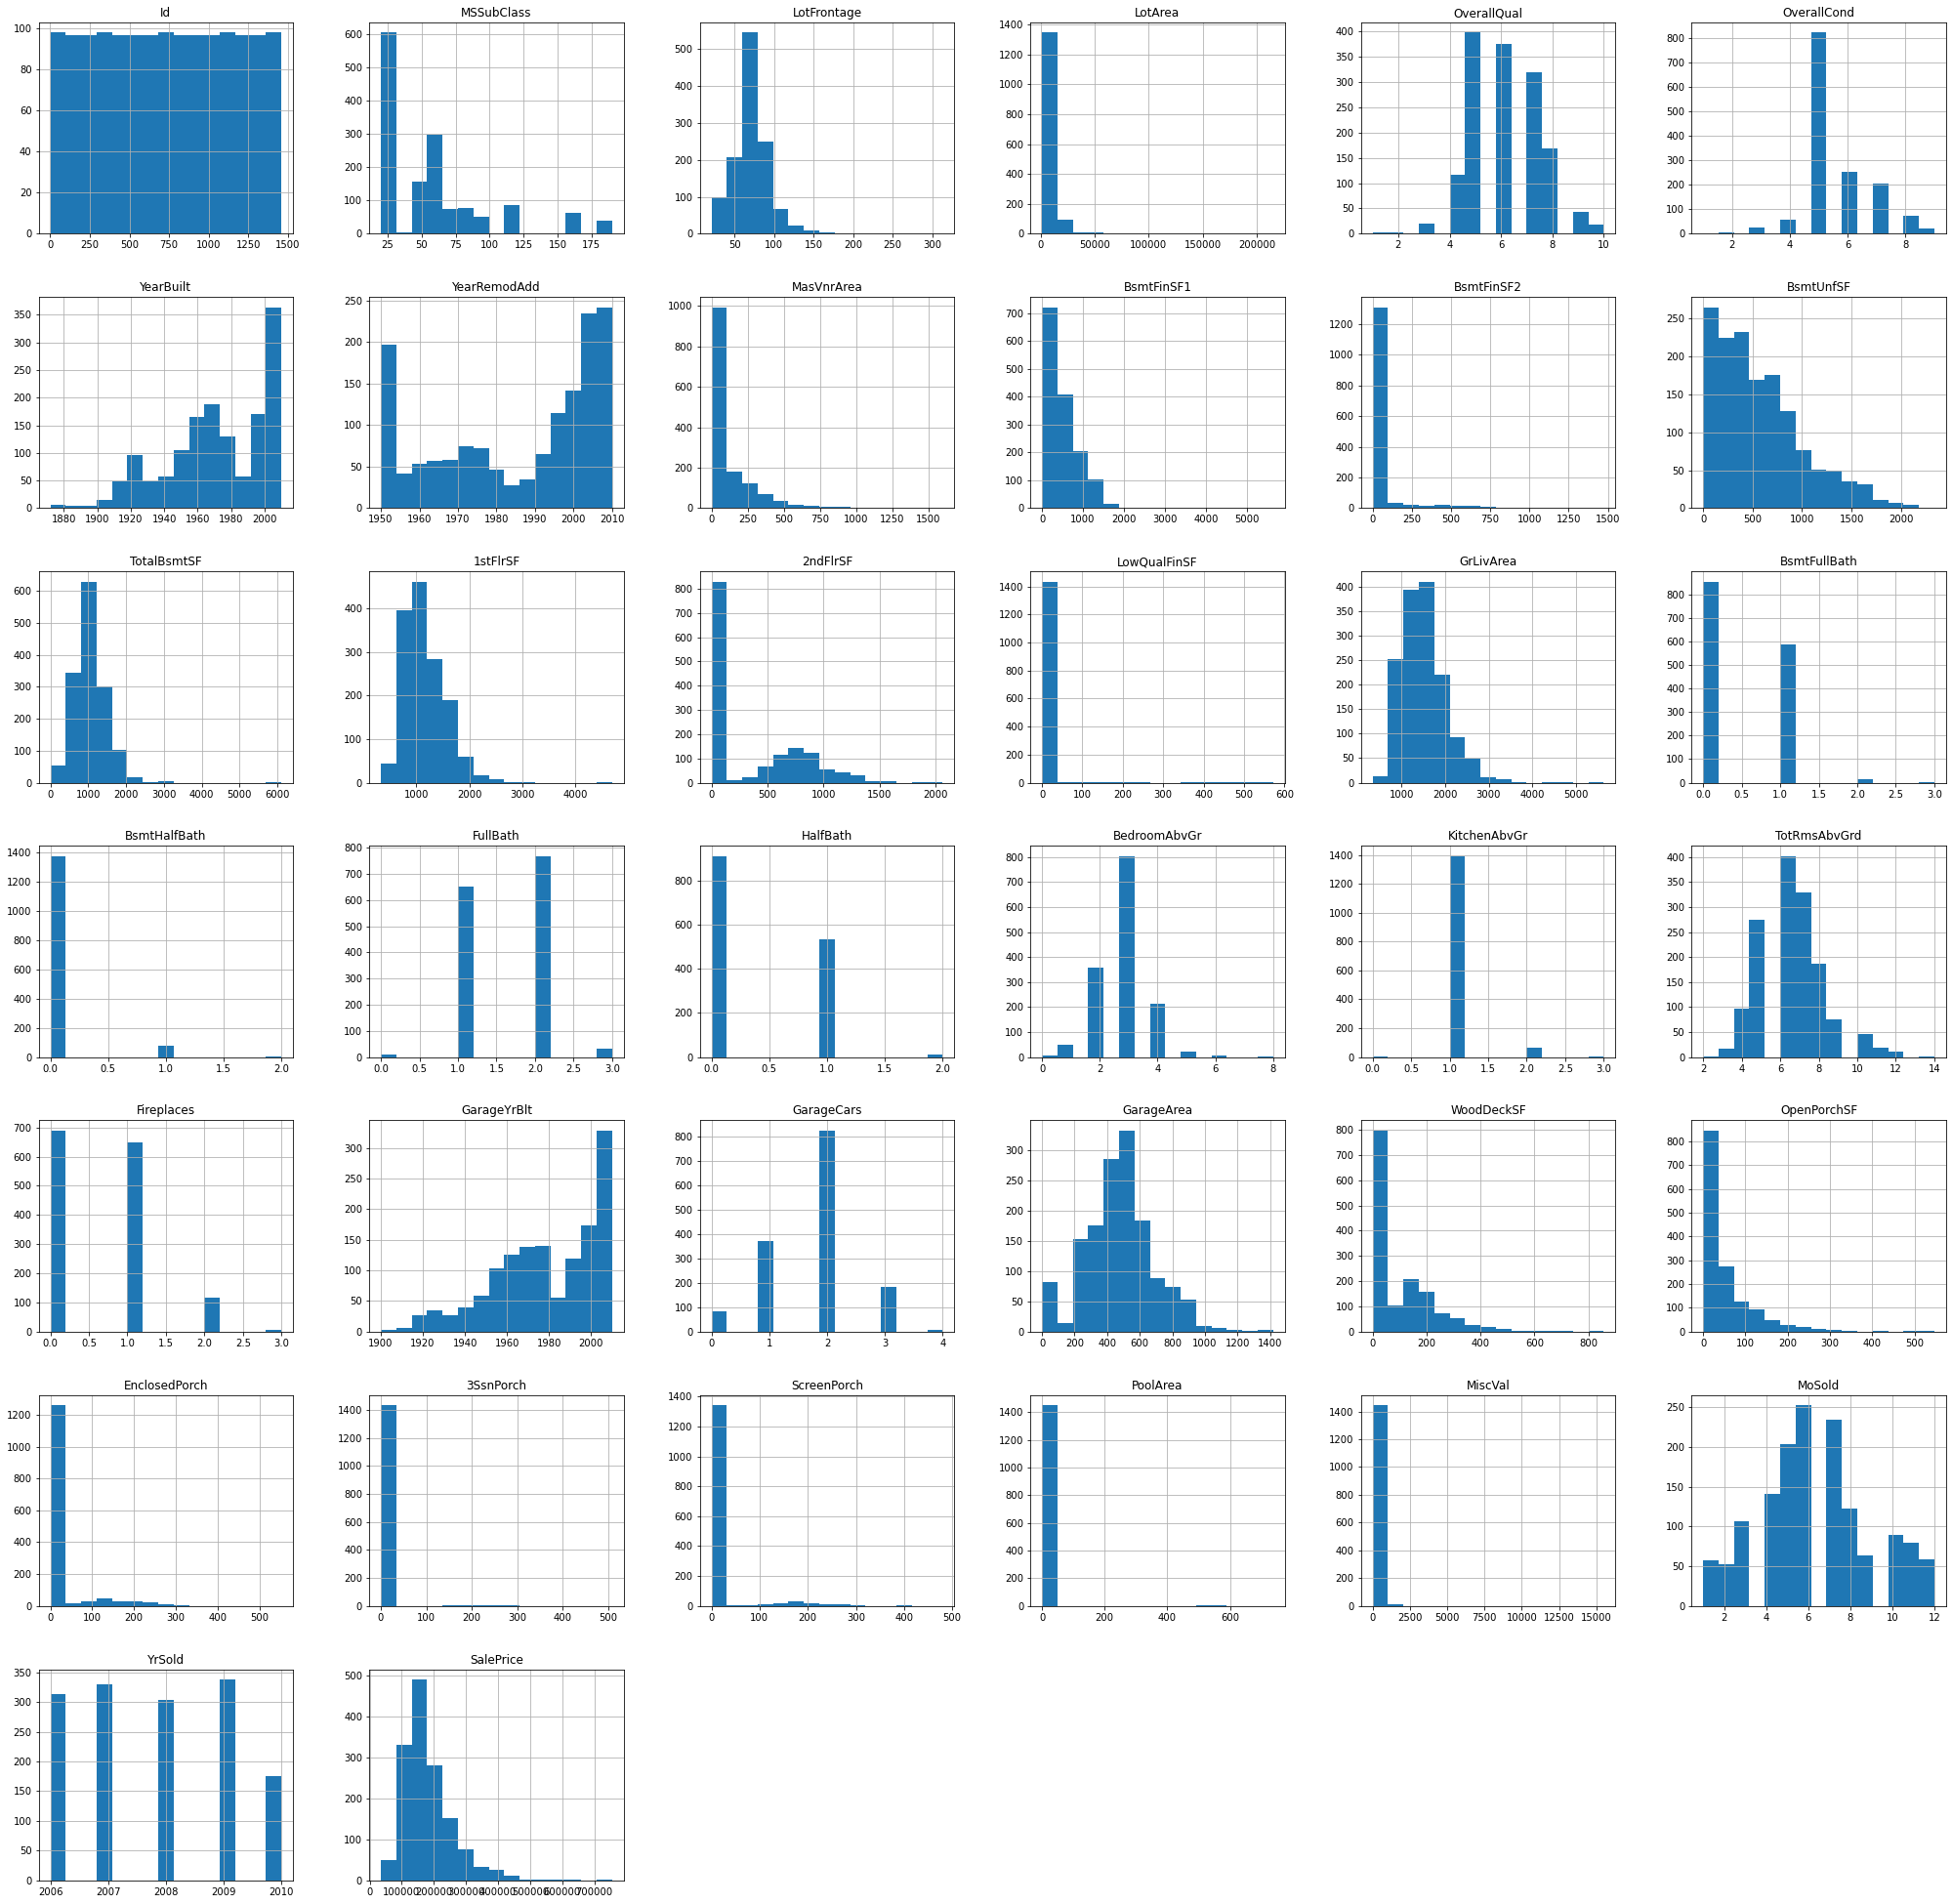

In [33]:
# A visual comparison of numerical values

ames_numerical.hist(bins=15, figsize=(35, 35))

In [ ]:
# Could be important in numerical

''' 

'BsmtUnfSF: Unfinished square feet of basement area'
'YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)'
'YearBuilt: Original construction date'
'TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)'
'GarageYrBlt: Year garage was built
'GarageArea: Size of garage in square feet'
'MoSold: Month Sold (MM)'

'''

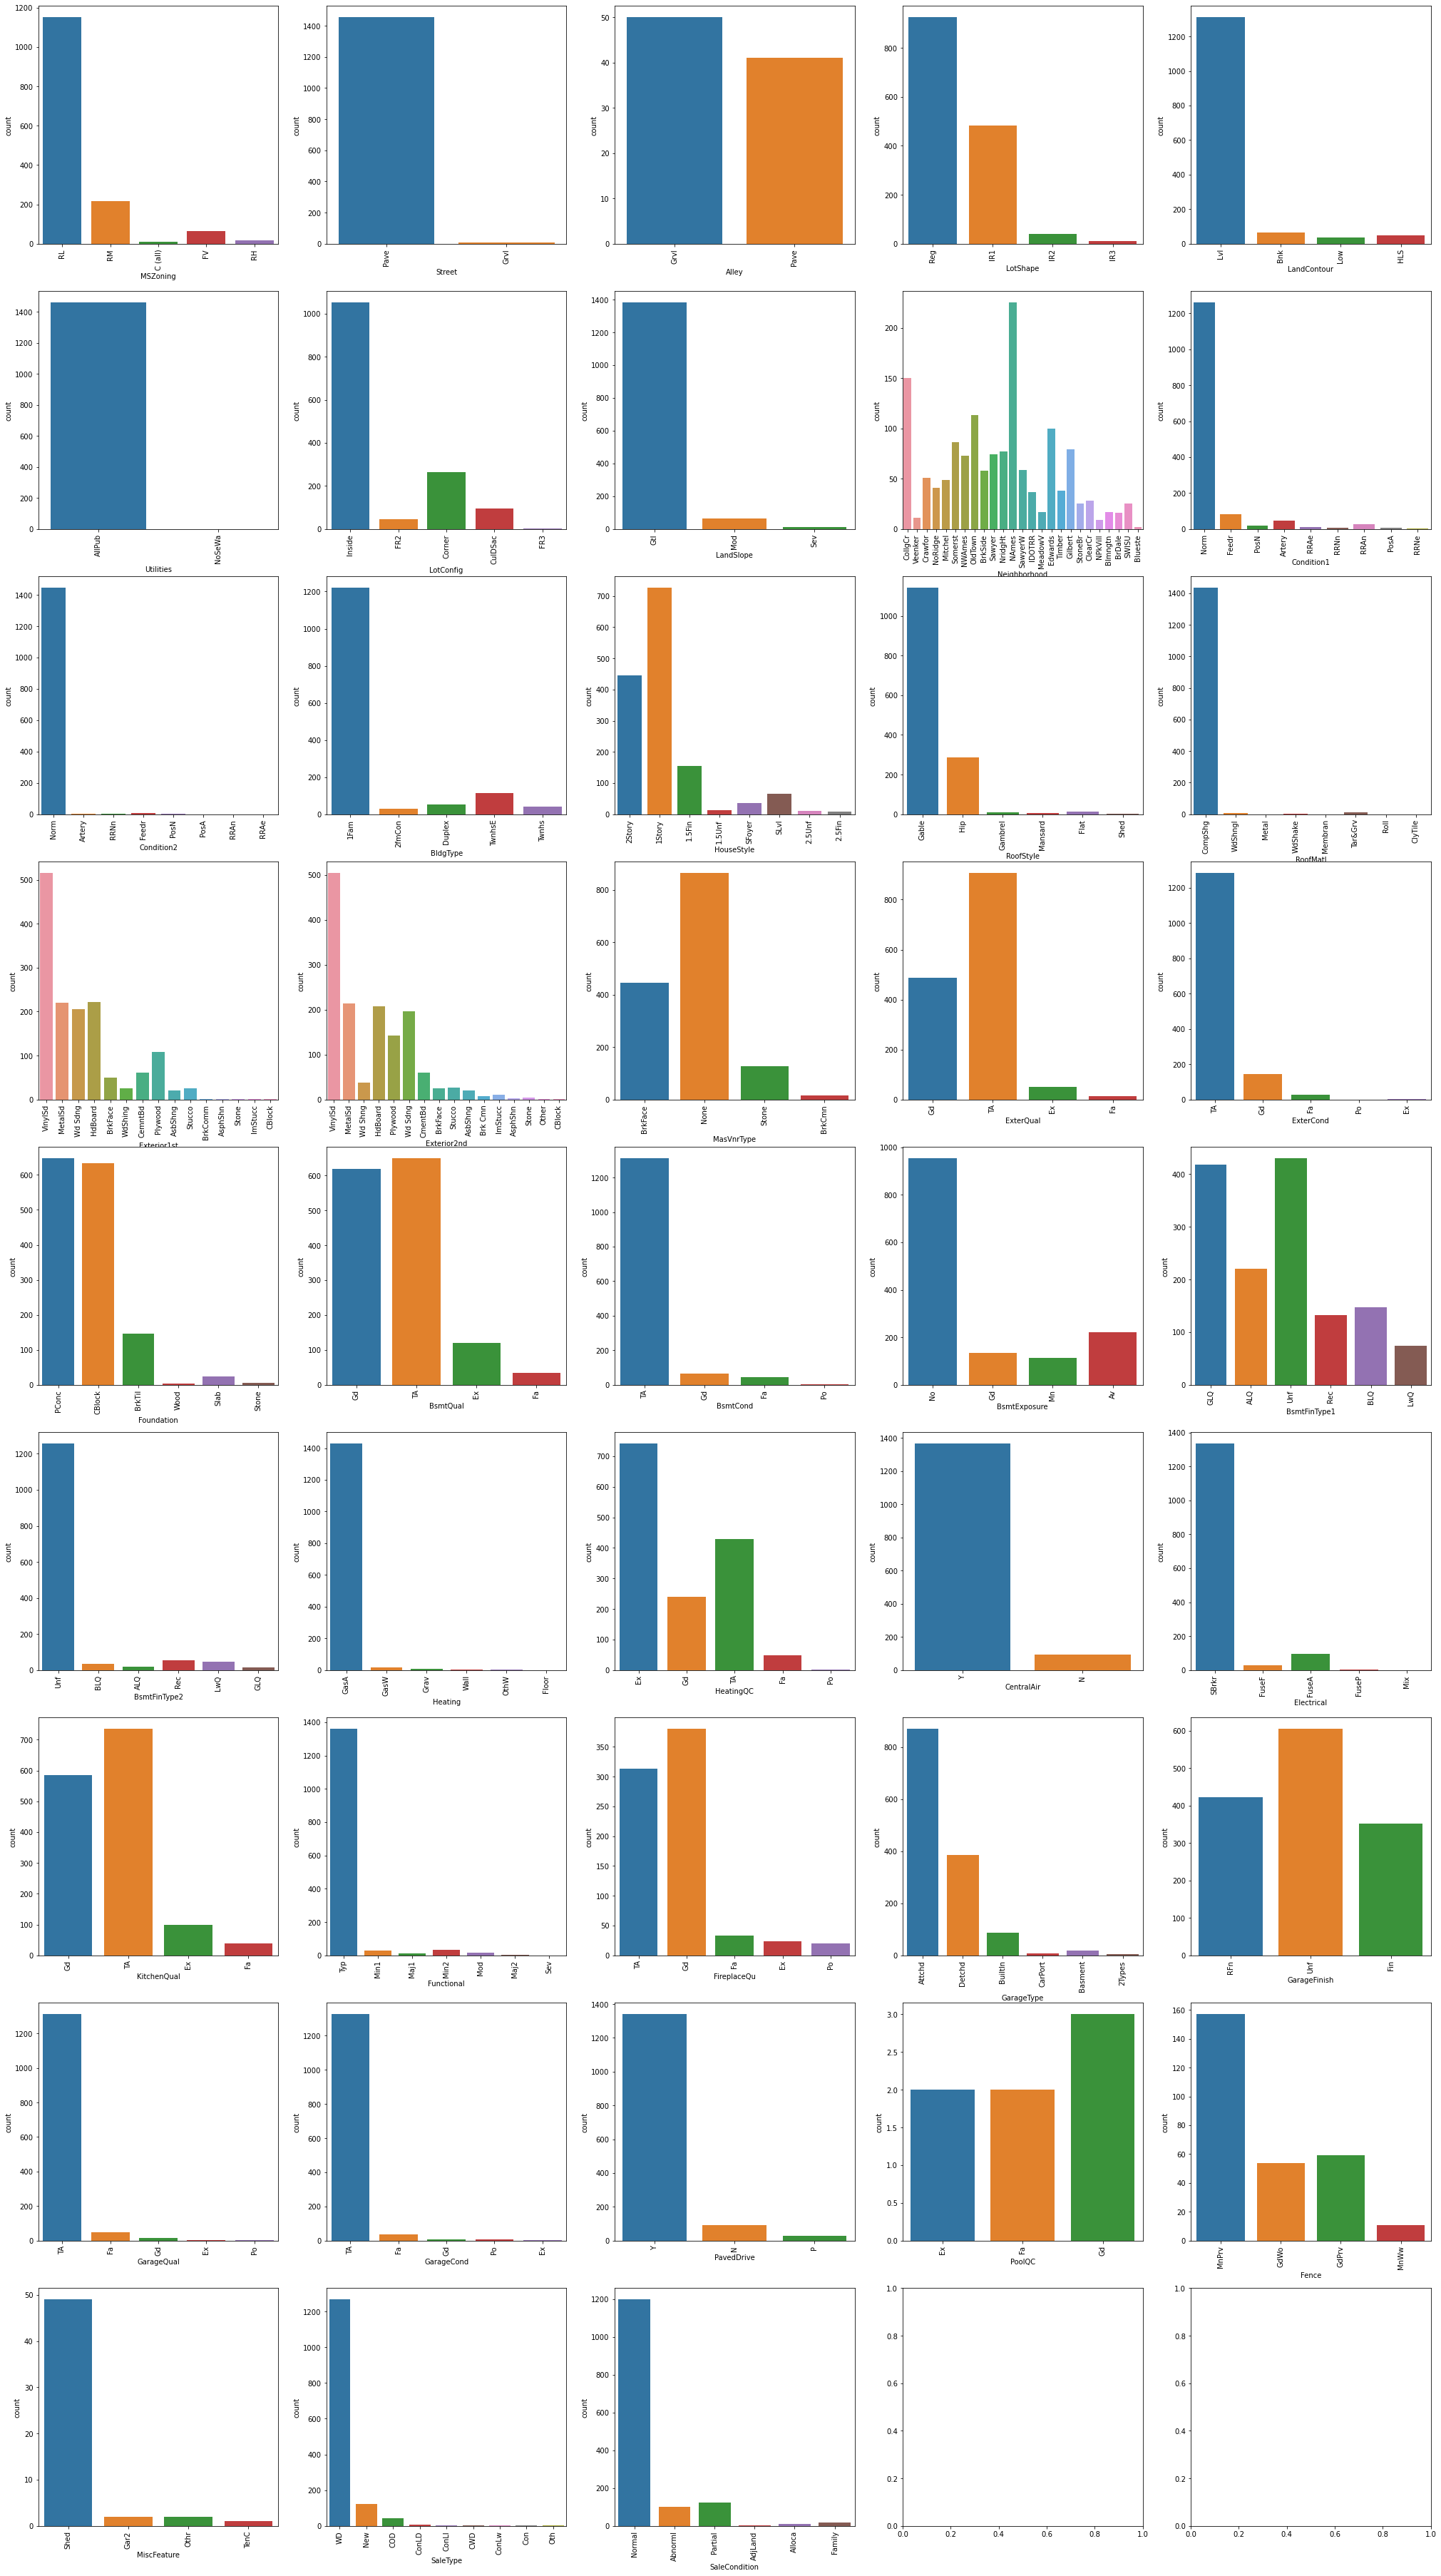

In [34]:
fig, ax = plt.subplots(9, 5, figsize=(35, 65))
for var, subplot in zip(cat_list, ax.flatten()):
    sns.countplot(x=ames_categorical[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
# Could be important in categorical
'''

'Neighborhood: Physical locations within Ames city limits'
'BsmtFinType1: Rating of basement finished area'
'GarageFinish: Interior finish of the garage'

'''

In [46]:
df_important = ames_df[["BsmtUnfSF", "YearRemodAdd", "YearBuilt", "TotRmsAbvGrd", "GarageYrBlt", 
                        "GarageArea", "MoSold", "Neighborhood", "BsmtFinType1", "GarageFinish"]]

In [47]:
df_important.head()

,BsmtUnfSF,YearRemodAdd,YearBuilt,TotRmsAbvGrd,GarageYrBlt,GarageArea,MoSold,Neighborhood,BsmtFinType1,GarageFinish
0,150,2003,2003,8,2003.0,548,2,CollgCr,GLQ,RFn
1,284,1976,1976,6,1976.0,460,5,Veenker,ALQ,RFn
2,434,2002,2001,6,2001.0,608,9,CollgCr,GLQ,RFn
3,540,1970,1915,7,1998.0,642,2,Crawfor,ALQ,Unf
4,490,2000,2000,9,2000.0,836,12,NoRidge,GLQ,RFn


In [51]:
df_important.isnull().sum().max()

81

In [52]:
df_important.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtUnfSF     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   TotRmsAbvGrd  1460 non-null   int64  
 4   GarageYrBlt   1379 non-null   float64
 5   GarageArea    1460 non-null   int64  
 6   MoSold        1460 non-null   int64  
 7   Neighborhood  1460 non-null   object 
 8   BsmtFinType1  1423 non-null   object 
 9   GarageFinish  1379 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 114.2+ KB


In [53]:
df_important.isnull().sum()

BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageArea       0
MoSold           0
Neighborhood     0
BsmtFinType1    37
GarageFinish    81
dtype: int64

In [54]:
df_important['GarageYrBlt'].fillna(value=0, inplace=True)

/Users/evapn/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [55]:
df_important.isnull().sum()

BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageArea       0
MoSold           0
Neighborhood     0
BsmtFinType1    37
GarageFinish    81
dtype: int64

In [ ]:
# ames_numerical.columns()

In [ ]:
# new_products_data = new_pdt_df.to_csv(r'C:\Users\NDA\Desktop\EVE\TMCG\documents\new_products_data.csv');

In [ ]:
fig, ax = plt.subplots(9, 5, figsize=(35, 65))
for var, subplot in zip(cat_list, ax.flatten()):
    sns.countplot(x=ames_categorical[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [ ]:
ames_df['SalePrice'].describe()

In [ ]:
# Important columns

'''
OverallQual
YearBuilt 
MoSold
GrLivArea
'''

In [ ]:
sns.distplot(ames_df['SalePrice'], kde=True, ax=None)

In [50]:
# px_sbclass = pd.concat([ames_numerical['SalePrice'], ames_numerical['MSSubClass']])
# sns.replot(x='MSSubClass', y='SalePrice', data=px_sbclass)